
Preprocessing Info:
Vocabulary size: 9010
Sequence length: 100
Total samples: 5572


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 100, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 656,001 (2.50 MB)

 Trainable params: 656,001 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - accuracy: 0.8755 - loss: 0.3217 - val_accuracy: 0.9803 - val_loss: 0.0768
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.9903 - loss: 0.0675 - val_accuracy: 0.9839 - val_loss: 0.0620
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9970 - loss: 0.0326 - val_accuracy: 0.9892 - val_loss: 0.0632
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9984 - loss: 0.0230 - val_accuracy: 0.9865 - val_loss: 0.0798
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.9987 - loss: 0.0185 - val_accuracy: 0.9857 - val_loss: 0.0598


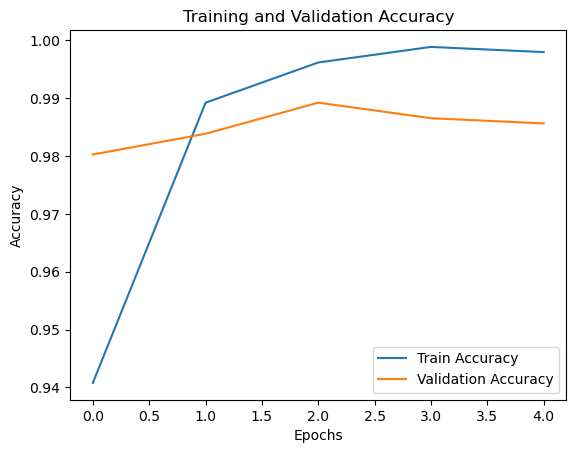

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# 1. Data Loading and Preprocessing
def load_data(filepath):
    data = pd.read_csv(filepath, sep='\t', names=['label', 'text'], header=None)
    data['label'] = data['label'].map({'ham': 0, 'spam': 1})
    return data

# Load dataset
sms_data = load_data('SMSSpamCollection')

# Text Preprocessing
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(sms_data['text'])
sequences = tokenizer.texts_to_sequences(sms_data['text'])
X = pad_sequences(sequences, maxlen=max_len)
y = sms_data['label'].values

# Print preprocessing info
print("\nPreprocessing Info:")
print(f"Vocabulary size: {len(tokenizer.word_index) + 1}")
print(f"Sequence length: {max_len}")
print(f"Total samples: {len(X)}")

# 3. Build the RNN Model using functional API
vocab_size = min(len(tokenizer.word_index) + 1, max_words)
inputs = tf.keras.Input(shape=(max_len,))
x = tf.keras.layers.Embedding(vocab_size, 128)(inputs)
x = tf.keras.layers.SimpleRNN(64, return_sequences=True)(x)
x = tf.keras.layers.SimpleRNN(32)(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# 4. Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X, y,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Make Predictions
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded)[0][0]
    return {
        'text': text,
        'sentiment': 'Spam' if prediction > 0.5 else 'Ham',
        'confidence': float(prediction if prediction > 0.5 else 1 - prediction)
    }


In [10]:
import os
print(os.listdir(r"Neural networks and deep learning\datasets\sms+spam+collection"))


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Neural networks and deep learning\\datasets\\sms+spam+collection'

In [ ]:
Jupyter_files/Neural networks and deep learning/datasets/sms+spam+collection/SMSSpamCollection

In [12]:
# Example prediction
sample_text = "U dun say so early hor... U c already then say..."
prediction_result = predict_sentiment(sample_text)
print(prediction_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
{'text': 'U dun say so early hor... U c already then say...', 'sentiment': 'Ham', 'confidence': 0.9980247165076435}
